# Свойства оценок

Задание 3:

Придумать распределение с 4 конечным моментами, 5 момент бесконечный

Сгенерировать выборку из такого распределения для N = $10^{4}$

Построить график плотности и нанести точки выборки

Для всех n <= N посчитать оценку $s^{2} = s^{2}(X1..Xn)$ для дисперсии

Построить график зависимости модуля разности оценки дисперсии и ее истинного значения от n

Провести аналогичное исследование для распределения Коши, построить график оценки дисперсии

In [2]:
#импортируем необходимые библиотеки
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

N = 10000

Populating the interactive namespace from numpy and matplotlib


Распределение с плотностью $\rho(x) = {5\over{x^{6}}}$      на луче $[1, +\infty)$  имеет очевидно как раз необходимое количество конечных моментов

In [3]:
#Сгенерируем выборку из распределения с такой плотностью
class distribution_gen(sps.rv_continuous):
    def _pdf(self, x):
        return (5/x**6)

distribution = distribution_gen(a = 1, name = "distribution") 
X = distribution.rvs(size = N)

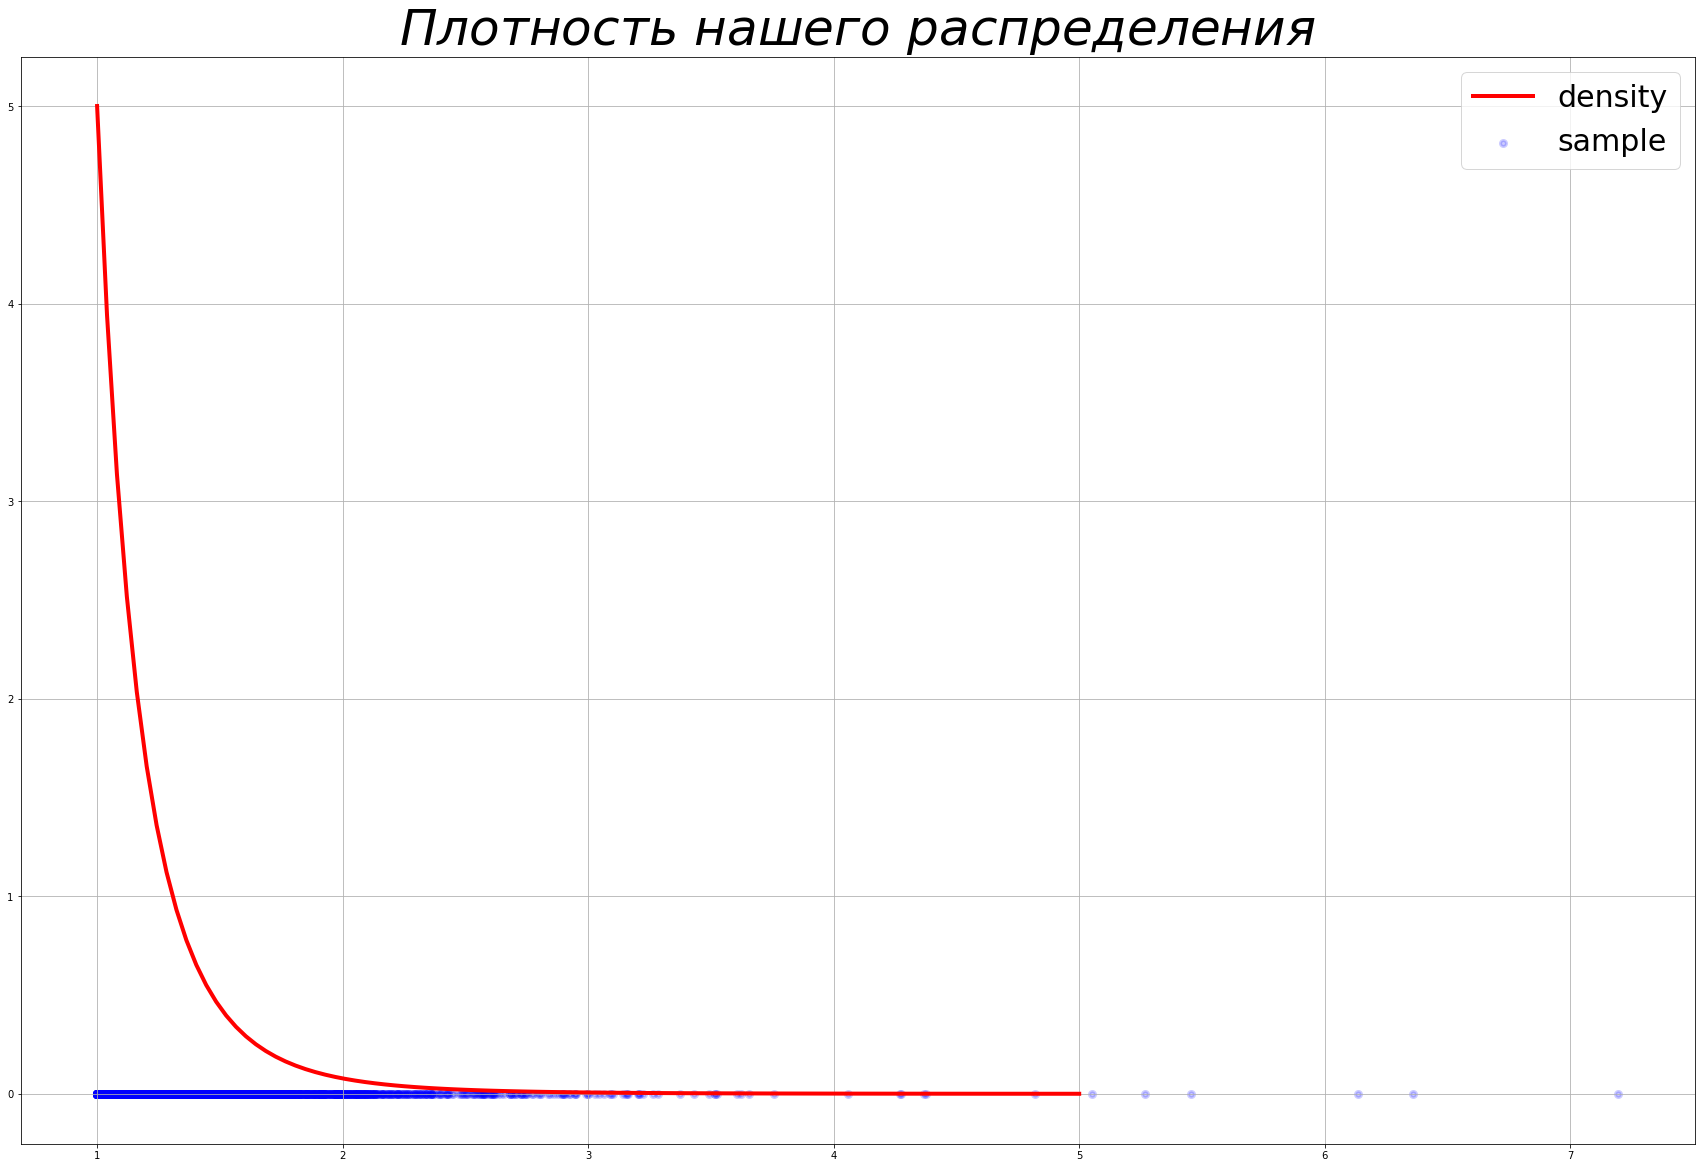

In [22]:
#построим график плотности и нанесем точки выборки
grid = np.linspace(1, 5, 100)
plt.figure(figsize=(30, 20))
plt.title('$Плотность\ нашего\ распределения$', fontsize = 50)
plt.grid()
plt.scatter(X, np.zeros(N), alpha=0.2, color = "blue", label='sample',linewidths=3)
plt.plot(grid, distribution.pdf(grid), color='red', label='density', linewidth=4)
plt.legend(loc = 'upper right', fontsize = 30)
plt.show()

Посчитаем отклонение от реальной дисперсии.
Реальная дисперсия : $\int_{1}^{\infty}x^2\rho(x)dx - (\int_{1}^{\infty}x\rho(x)dx)^2 = \int_{1}^{\infty}\frac{5}{x^4}dx - (\int_{1}^{\infty}\frac{5}{x^5}dx)^2 = \frac{5}{48}$

In [23]:
#посчитаем оценку на дисперсию и отклонение ее от реального значения
deviation = []
for i in range(0, N):
    Xn = X[:i+1]
    deviation.append(abs(Xn.std()**2 - (5/48)))    

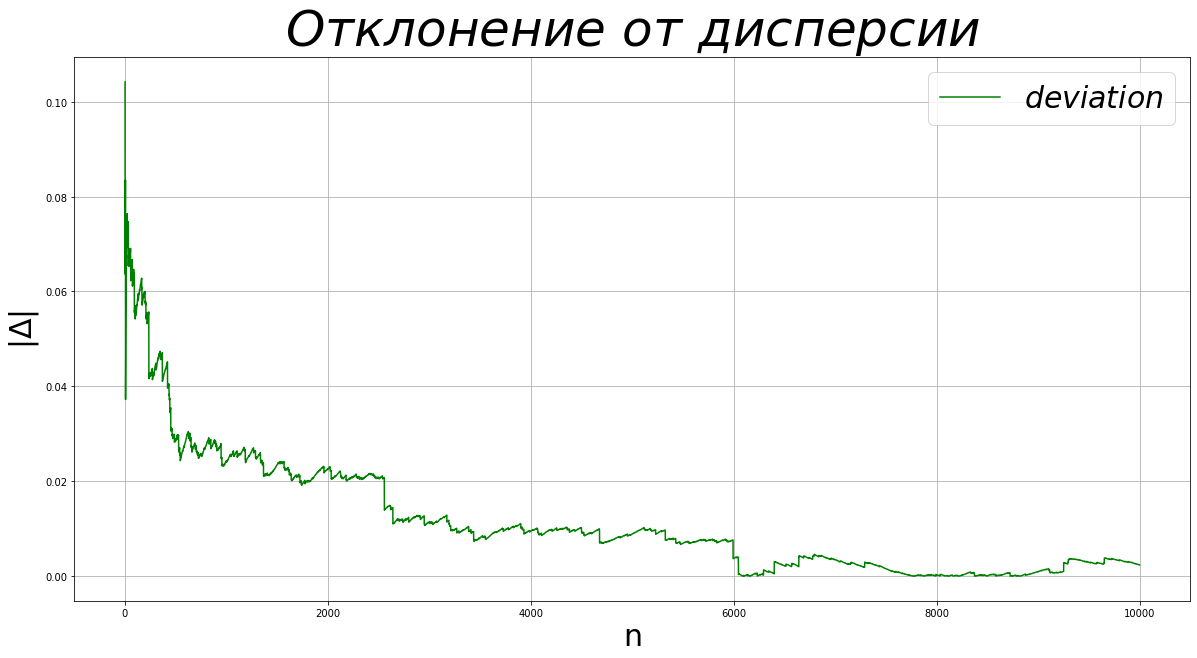

In [24]:
#строим график отклонения
plt.figure(figsize=(20,10))
plt.grid()
plt.title('$Отклонение\ от\ дисперсии$', fontsize = 50);
plt.plot(np.arange(1, N + 1), deviation, color = 'green', label='$deviation$');
plt.legend(loc='upper right', fontsize = 30)
plt.ylabel('$|\\Delta|$', fontsize = 30);
plt.xlabel('n', fontsize = 30)
plt.show()

Проделаем то же самое для распределени Коши

In [25]:
#генерируем выборку
X_cauchy = sps.cauchy.rvs(size = N, loc = 0, scale = 0.5)

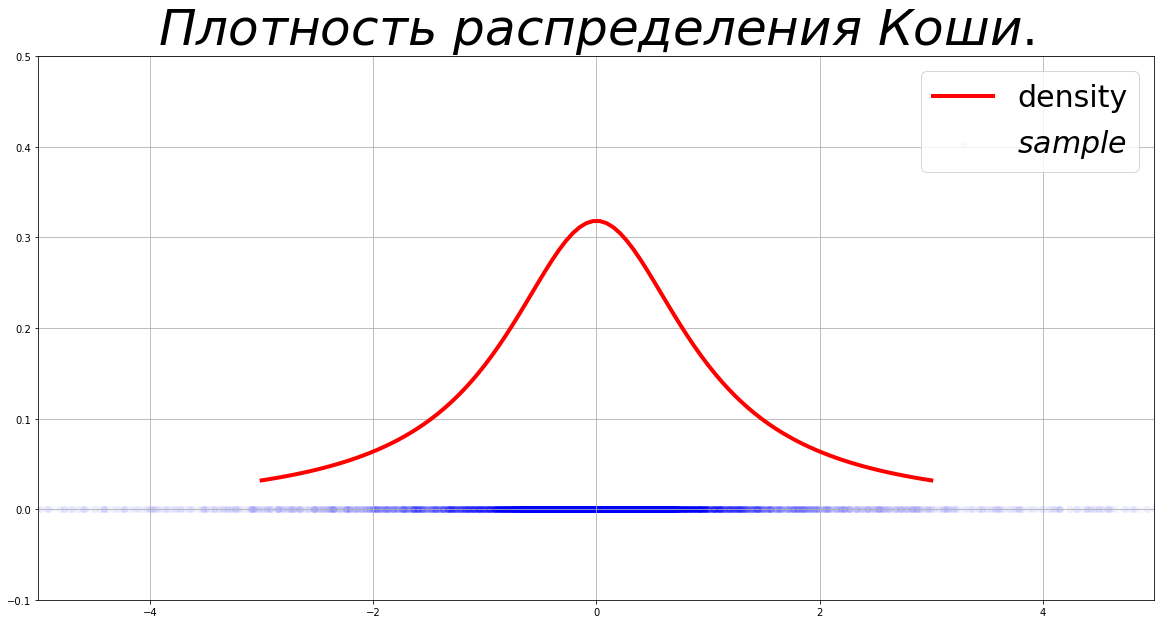

In [33]:
#строим график
plt.figure(figsize=(20,10))
plt.xlim(-5, 5);
plt.ylim(-0.1, 0.5);
plt.grid()
plt.title('$Плотность\ распределения\ Коши.$', fontsize = 50);
grid = np.linspace(-3, 3, 100)
plt.plot(grid, sps.cauchy.pdf(grid), color='red', label='density', linewidth=4)
plt.scatter(X_cauchy, np.zeros(N), color = 'blue', alpha = 0.02, label = '$sample$');
plt.legend(loc='upper right', fontsize = 30)
plt.show()

In [28]:
#посчитаем оценку дисперсии
deviation_val_cauchy = []
for i in range(0, N):
    Xn_cauchy = X_cauchy[:i+1]
    deviation_val_cauchy.append(Xn_cauchy.std()**2)

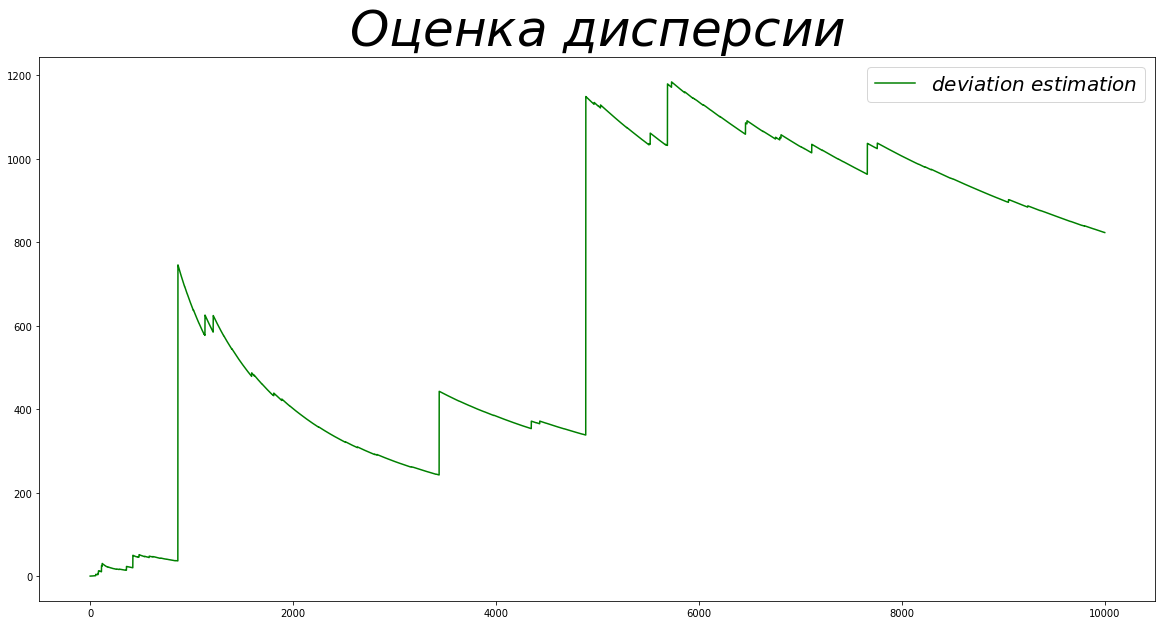

In [32]:
plt.figure(figsize=(20,10))
plt.title('$Оценка\ дисперсии$', fontsize = 50);
plt.plot(np.arange(1, N + 1), deviation_val_cauchy, color = 'green', label = '$deviation\ estimation$');
plt.legend(loc='upper right', fontsize = 20)
plt.show();